In [3]:
!pip install tensorflow==2.16.0-rc0 scikit-learn==1.4.1.post1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: scikit-learn


In [2]:
!pip install kaggle

In [39]:
!pip install librosa

In [4]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir ~/.kaggle

In [6]:
!mv kaggle.json ~/.kaggle/

In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets list

ref                                                 title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                  Vehicle Sales Data                        19MB  2024-02-21 20:16:17           9422        166  1.0              
arnavvvvv/spotify-music                             Top Spotify Songs                         47KB  2024-03-06 05:20:29           1331         30  1.0              
tarunrm09/climate-change-indicators                 Climate change Indicators                 34KB  2024-02-22 08:53:54           4857        108  1.0              
parasrupani/coffee-distribution-across-94-counties  Coffee Distribution Across 94 Counties   220KB  2024-02-28 01:49:07           1106         23  1.0              
zain280/ti

In [9]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 97% 417M/428M [00:03<00:00, 168MB/s]
100% 428M/428M [00:03<00:00, 133MB/s]


In [12]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [76]:
!pip install ipython

In [77]:
import os
import librosa
import soundfile
import numpy as np
import pandas as pd
import IPython

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import keras
from keras.utils import to_categorical

In [30]:
audios = []
labels = []

In [31]:
for folder in os.listdir('/content/TESS Toronto emotional speech set data/'):
  if folder == '.ipynb_checkpoints':
    pass
  else:
    for audio in os.listdir(os.path.join('/content/TESS Toronto emotional speech set data/', folder)):
      labels.append(folder)
      audios.append(os.path.join('/content/TESS Toronto emotional speech set data/', folder, audio))

In [32]:
len(audios),len(labels)

(2800, 2800)

In [33]:
audios[0], labels[0]

('/content/TESS Toronto emotional speech set data/YAF_sad/YAF_rough_sad.wav',
 'YAF_sad')

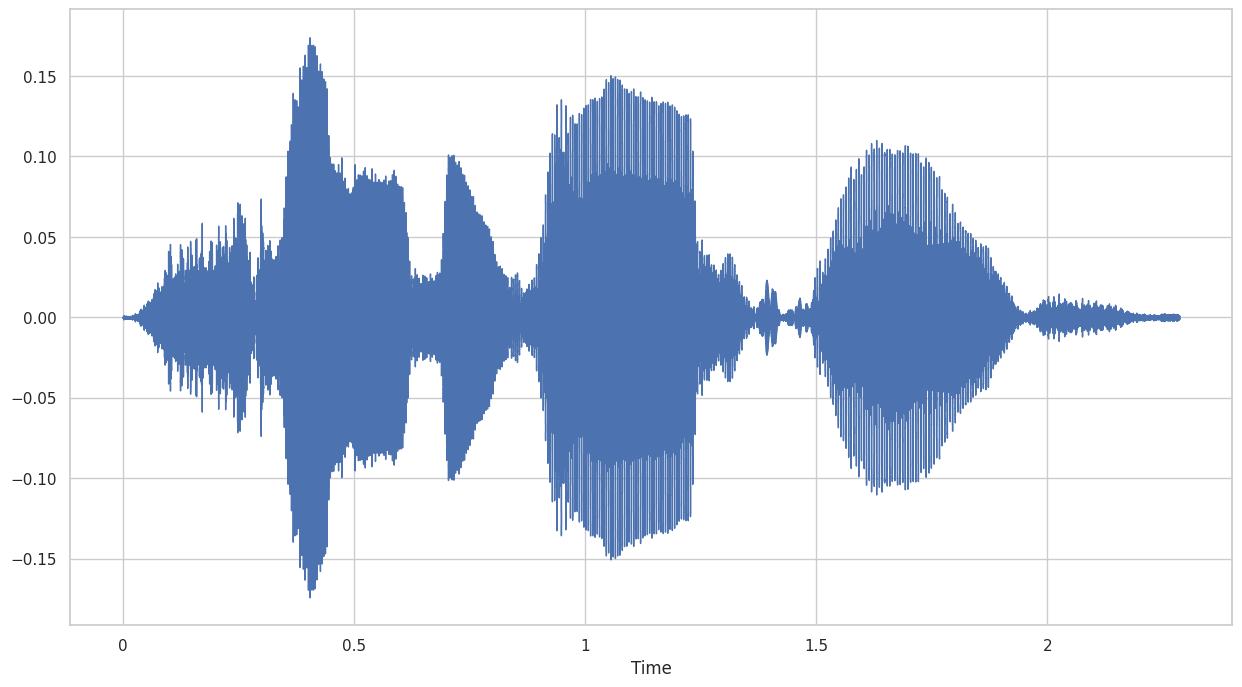

In [79]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid')
x, fs = librosa.load(os.path.abspath(audios[0]))
librosa.display.waveshow(x)

In [43]:
def extract_features(audio_path):
  results = np.array([])
  with soundfile.SoundFile(audio_path) as file:
    X = file.read(dtype='float32')
    sr = file.samplerate
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr).T, axis=0)
  results = np.hstack((results, mfccs))
  chroma = np.mean(librosa.feature.chroma_stft(y=X, sr=sr))
  results = np.hstack((results, chroma))
  mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sr))
  results = np.hstack((results, mel))
  return results

In [44]:
X = []
for audio in audios:
  X.append(extract_features(audio))

In [48]:
encoder = LabelEncoder()
label_encoded = encoder.fit_transform(labels)

In [49]:
y = to_categorical(label_encoded)

In [51]:
X = np.array(X)
y = np.array(y)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [58]:
y_pred = model.predict(x_test)

In [59]:
score = accuracy_score(y_test, y_pred)

In [60]:
score

0.9571428571428572

In [64]:
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.81      0.97      0.89        40
           2       1.00      1.00      1.00        40
           3       0.97      1.00      0.99        39
           4       0.94      0.94      0.94        47
           5       0.98      0.94      0.96        52
           6       1.00      0.97      0.98        33
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.99        37
           9       1.00      1.00      1.00        43
          10       1.00      0.98      0.99        49
          11       0.94      1.00      0.97        30
          12       1.00      1.00      1.00        37
          13       1.00      0.97      0.99        37

   micro avg       0.97      0.98      0.97       560
   macro avg       0.97      0.98      0.98       560
weighted avg       0.97      0.98      0.97       560
 samples avg       0.97   

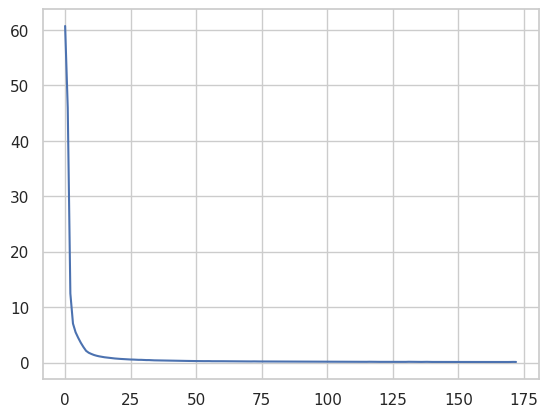

In [83]:
loss = model.loss_curve_
plt.plot(loss)

In [88]:
test = model.predict(np.array([x_test[0]]))
encoder.classes_[np.argmax(test)]

'OAF_disgust'

In [84]:
import joblib
joblib.dump(model, 'Emotion_Detector_Audio.joblib')

['Emotion_Detector_Audio.joblib']

In [85]:
encoder.classes_

array(['OAF_Fear', 'OAF_Pleasant-surprise', 'OAF_Sad', 'OAF_angry',
       'OAF_disgust', 'OAF_happy', 'OAF_neutral', 'YAF_angry',
       'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral',
       'YAF_pleasant_surprised', 'YAF_sad'], dtype='<U22')